# Sampling and Quantization

:::{note}
This notebook is adapted from the content of sections [Sampling](https://francescopapaleo.github.io/audio-signal-processing/notebooks/sampling.html) and [Quantization](https://francescopapaleo.github.io/audio-signal-processing/notebooks/quantization.html) in Jupyter Book *"Audio Signal Processing Concepts Explained with Python"* by Francesco Papaleo.
:::


(primer-sampling)=
## Sampling

While a sound wave corresponds to a process continuous in time, recording it converts it to a digital discrete-time signal. The sampling strategy determines the ability to reconstruct the original signal from the observations. In general higher sampling rate improves the reconstruction, but the exact relationship between the sampling rate and the inherent frequency components in the signal determines if we can reconstruct it. We will demonstrate through the Sine Wave example. Since we cannot have a continuous signal in the notebook, we will start with one uniformly sampled at high sampling rate and will reduce the resolution.

### Sine Wave Sampling Example

* Continuous Sine Wave **5Hz** -> High resolution **10000 samples/s** ->  Low resolution **50 samples/s**.

In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

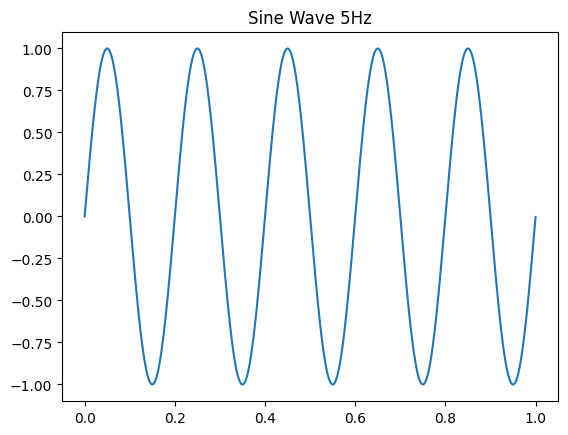

In [17]:
# Sine Wave 5Hz
freq = 5 
N = 10000 # number of samples
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
A = 1 # amplitude
cw = A*np.sin(2*np.pi*freq*time) # zero phase

plt.title("Sine Wave 5Hz")
plt.plot(time, cw)

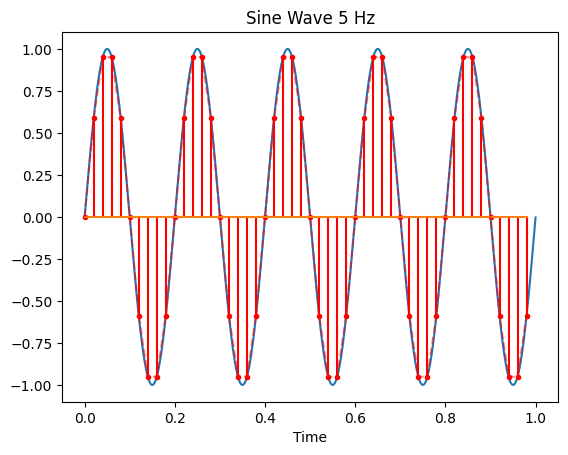

In [18]:
freq = 5
N_high = 10000
N_low = 50
end_time = 1
A = 1

# high res
time_high = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
cw = A*np.sin(2*np.pi*freq*time_high) # zero phase
plt.title("Sine Wave 5 Hz")
plt.xlabel("Time")
plt.plot(time, cw)

# low res
time_low = np.linspace(0, end_time, end_time*N_low, endpoint=False)
cw_sampled = A*np.sin(2*np.pi*freq*time_low) # sampled cw sample

plt.stem(time_low, cw_sampled, linefmt='r-', markerfmt='.', basefmt='', label='Sampled Signal (Aliased)')
plt.plot(time_low, cw_sampled, 'r--', alpha=0.5)


##

In [19]:
def sample(N_low):

    freq = 5
    N_high = 10000
    end_time = 1
    A = 1

    # high res
    time_high = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
    cw = A*np.sin(2*np.pi*freq*time_high) # zero phase
    plt.title("Sine Wave 5Hz")
    plt.plot(time, cw)

    # low res
    time_low = np.linspace(0, end_time, end_time*N_low, endpoint=False)
    cw_sampled = A*np.sin(2*np.pi*freq*time_low) # sampled cw sample

    plt.stem(time_low, cw_sampled, linefmt='r-', markerfmt='.', basefmt='', label='Sampled Signal (Aliased)')
    plt.plot(time_low, cw_sampled, 'r--', alpha=0.5)

In [20]:
from ipywidgets import widgets

In [ ]:
out = widgets.interact(sample, N_low=(1,100))

interactive(children=(IntSlider(value=50, description='N_low', min=1), Output()), _dom_classes=('widget-intera…

At which sampling rate does start to fail?

:::{important}

The **Nyquist rate** of the signal is twice the highest frequency in the signal. When sampling at a higher rate, the reconstructio is distortion free, while if it is lower we observe **aliasing** artifacts.
:::

(primer-quantization)=
## Quantization
So far we discussed the digitization of the signal through sampling in time, here we will talk about the digitization of the amplitude values. We cannot store infinite floating point values. We store each amplitude value in a finite number of **bits**.

**$b$ bit depth** - number of bits to store amplitude

**$2^{b}$** - number of levels to represent amplitude 

**quantized signal** - the values of the signal are rounded up to the closest quantization level

In [21]:
# Function to quantize signal
def quantize(signal, bit_depth):
    levels = 2 ** bit_depth
    quantized_signal = np.round((signal + 1) * (levels / 2)) / (levels / 2) - 1
    return quantized_signal

In [22]:
def plot_quantized(bits):

    quantized_x = quantize(cw, bits)
    sb_value = 2 / (2 ** bits)  # LSB value

    plt.plot(time[:2000], cw[:2000], 'k', linestyle='dashed', alpha=0.5, label="Original Signal")
    plt.step(time[:2000], quantized_x[:2000], 'b', label=f"{bits}-bit Quantized Signal", where='mid')
    plt.xlabel("Time")
    plt.title(f"Quantization at {bits}-bit Depth")
    

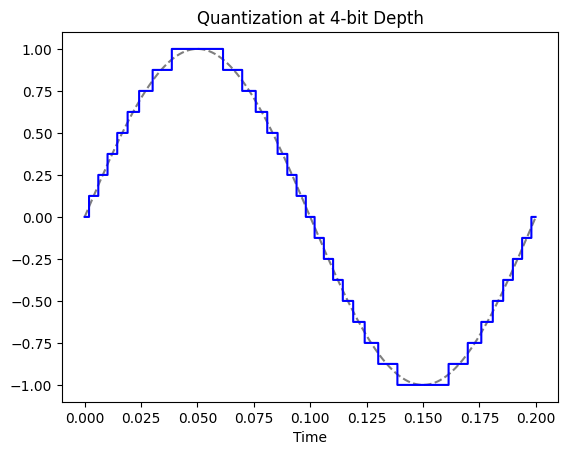

In [23]:
plot_quantized(4)

In [23]:
out = widgets.interact(plot_quantized, bits=(4, 16))

interactive(children=(IntSlider(value=10, description='bits', max=16, min=4), Output()), _dom_classes=('widget…

**Dynamic range (dB)** = $20 \log_{10}(2^b)$

**Exercise 1:** calculate the maximum quantization error for a sample point for a sequence of bits: 4, 8, 16, 32.

**Exercise 2:** calculate the dynamic range for a sequence of bit-depths: 4, 8, 16, 32. 